<a href="https://colab.research.google.com/github/apollonov-evgeniy/2/blob/main/proj12_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B7%D0%B0%D0%BA%D0%B0%D0%B7%D0%BE%D0%B2_%D1%82%D0%B0%D0%BA%D1%81%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Исправлены ошибки. Работа выполнялась на локальном компьютере. Notebook тренажера считать никак не мог
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Отлично, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Подбор параметров теперь реализован абсолютно верно, молодец!
* Удачи в дальнейшем обучении и следующих работах!

In [ ]:
# import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
sns.set()
import time

In [ ]:
#Игнорирование предупреждений
import warnings
warnings.filterwarnings('ignore')

#базовые библиотеки машинного обучения
from scipy import stats as st 


from sklearn.metrics import roc_curve, roc_auc_score, r2_score, mean_absolute_error, mean_squared_error, make_scorer

from sklearn.linear_model import  LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

from lightgbm import LGBMRegressor 

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit

from sklearn.utils import shuffle

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import TimeSeriesSplit

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в верхней части ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

## Описание проекта

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

### Инструкция по выполнению проекта

1. Загрузите данные и выполните их ресемплирование по одному часу.
2. Проанализируйте данные.
3. Обучите разные модели с различными гиперпараметрами. Сделайте тестовую выборку размером 10% от исходных данных.
4. Проверьте данные на тестовой выборке и сделайте выводы.

### Описание данных

Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце '*num_orders*' (от англ. *number of orders*, «число заказов»).



# 1. Подготовка

In [ ]:
pd.read_csv("https://code.s3.yandex.net/datasets/taxi.csv").head()

In [ ]:
df1 = pd.read_csv("https://code.s3.yandex.net/datasets/taxi.csv", index_col=['datetime'], parse_dates=['datetime'])

In [ ]:
df1.info()

In [ ]:
df1.sort_index(inplace= True)
print(df1.index.is_monotonic)

In [ ]:
df1 = df1.resample('1h').sum()
df1.info()

In [ ]:
df1.head()

In [ ]:
target = "num_orders"

In [ ]:
df1.index.min(), df1.index.max()

<div class="alert alert-block alert-success">
<b>Успех:</b> Загрузка, первичный осмотр и ресемплинг проведены хорошо.
</div>

# 2. Анализ

In [ ]:
decomposed = seasonal_decompose(df1['num_orders'])

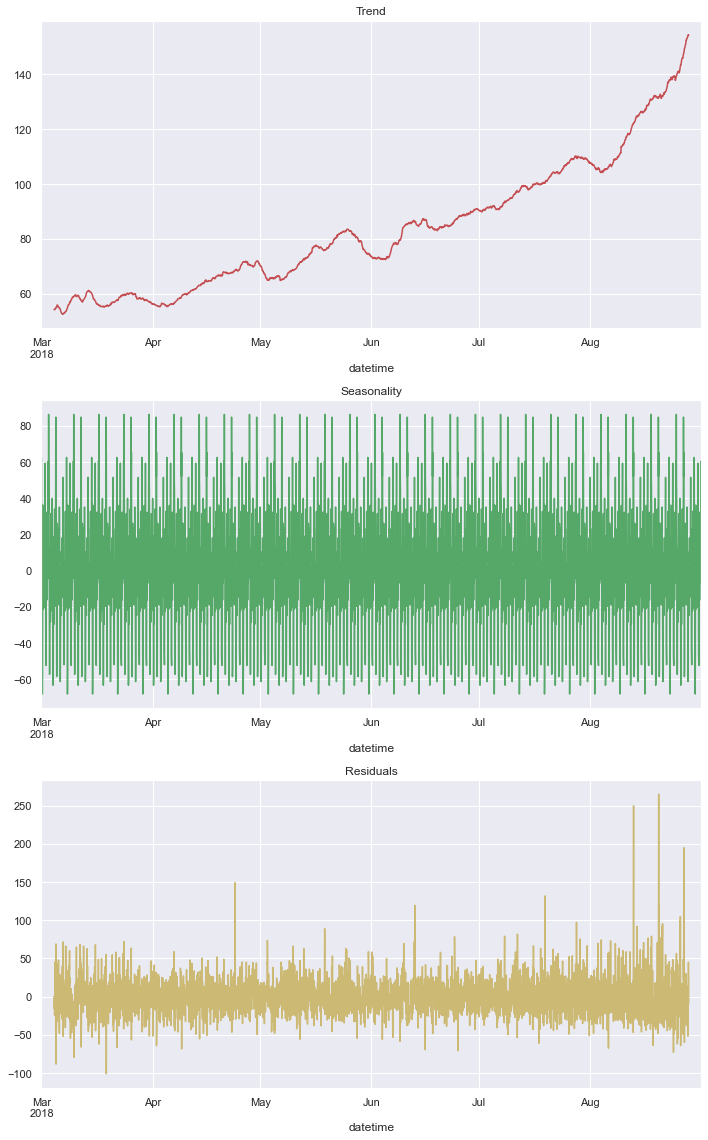

In [ ]:
decomposed = seasonal_decompose(df1, freq=24*7)

plt.figure(figsize=(10, 16))
plt.subplot(311)

decomposed.trend.plot(ax=plt.gca(), color = 'r')
plt.title('Trend')
plt.subplot(312)

decomposed.seasonal.plot(ax=plt.gca(), color = 'g')
plt.title('Seasonality')
plt.subplot(313)

decomposed.resid.plot(ax=plt.gca(), color = 'y')
plt.title('Residuals')

plt.tight_layout()

<div class="alert alert-block alert-info">
<b>Совет: </b> Декомпоизровать лучше было ряд по часам (для этого не нужно было менять freq).
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> График сезонности лучше было бы построить на более коротком интервале.
</div>

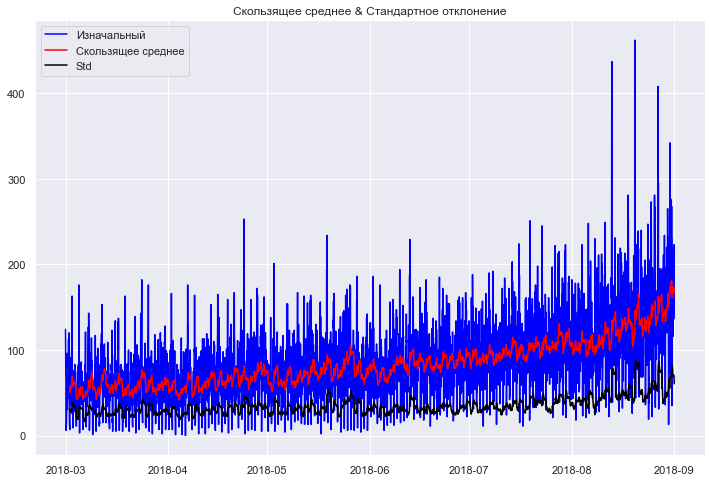

In [ ]:
rolmean = df1["num_orders"].rolling(window = 30).mean()
rolstd = df1["num_orders"].rolling(window = 30).std()
fig = plt.figure(figsize=(12, 8))
orig = plt.plot(df1["num_orders"], color='blue',label='Изначальный')
mean = plt.plot(rolmean, color='red', label='Скользящее среднее')
std = plt.plot(rolstd, color='black', label = 'Std')
plt.legend(loc='best')
plt.title('Скользящее среднее & Стандартное отклонение')
plt.show()

## Вывод

1. Мы наблюдаем четкую тенденцию к росту
2. Среднее и дисперсия увеличиваютс по времени
3. Как мы видим, есть сезонность
4. Мы также наблюдаем всплески, которые могут быть вызваны внешними событиями (праздники, погода?)
Первые два пункта  являются признаком того, что процесс явно не стационарный  
 Стохастический процесс не стационарный.

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что сам ряд был визуализиорован. Согласен, что есть возратсающий тренд.
   
</div>

# 3. Обучение

In [ ]:
def prepare_data(df, target="num_orders", window_size=20, n_lag=30):
    data = df.copy()
    data['rolling_mean'] = data[target].shift().rolling(window_size).mean()
    for lag in range(1, n_lag + 1):
        data["lag_{}".format(lag)] = data[target].shift(lag)
    data['dayofweek'] = data.index.dayofweek
    data['month'] = data.index.month
    data['week'] = data.index.week
    data['dayofmonth'] = data.index.day
    data['hour'] = data.index.hour
    data['is_weekend'] = data.dayofweek.isin([5,6])*1
    # data = data.dropna()
    return data

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что создается новый датафрейм, а не изменяется глобальная переменная.
</div>

In [ ]:
def model_visual(test, pred):
    residual = test - pred

    rmse = np.sqrt(mean_squared_error(test, pred))
    print('RMSE:')
    print(rmse)

    fig = plt.figure(figsize=(30,30))
    ax1 = plt.subplot(211)
    sns.distplot(residual, color ='red')
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.title('Residual counts',fontsize=35)
    plt.xlabel('Residual',fontsize=25)
    plt.ylabel('Count',fontsize=25)

    ax2 = plt.subplot(212)
    plt.scatter(pred, residual, color ='teal')#
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xlabel('Predicted',fontsize=25)
    plt.ylabel('Residual',fontsize=25)
    plt.axhline(y=0)
    plt.title('Residual vs. Predicted',fontsize=35)

    plt.show()

    A = test.reshape(-1, 1)
    B = pred.reshape(-1, 1)
    plt.rcParams['figure.figsize'] = 16,5
    plt.figure()
    plt.plot(A[-100:], label="Real")
    plt.plot(B[-100:], label="Predicted")
    plt.legend()
    plt.title('Real vs Predicted',fontsize=20)
    plt.xticks(())
    plt.show()

In [ ]:
rmse_func = lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
df= prepare_data(df1, target="num_orders", window_size=5, n_lag=5)

<div class="alert alert-block alert-info">
<b>Совет: </b> Параметр лага можно было выбрать на основе графика сезонности.
</div>

In [ ]:
df.head()

Методом перебора подберем параметры для дополнительных признаков для 4 моделей

In [ ]:
result = pd.DataFrame(columns = ['window_size', 'n_lag', 'rmse_Ridge', 'rmse_LGBMReg', 'rmse_Lasso', 'rmse_RandFReg'])
i= 0
model_Ridge = Ridge()
model_LGBMRegressor = LGBMRegressor(objective="RMSE", random_state=12345)
model_Lasso = Lasso(alpha=0.1)
model_RandomForestRegressor = RandomForestRegressor()

n_lag = 24

for window_size in range(1, 52, 5):
    
        df= prepare_data(df1, target="num_orders", window_size=window_size, n_lag=n_lag)
         
        X_train, X_test = train_test_split(df, shuffle=False, test_size=0.1)
        
        
        X_train = X_train.dropna()
        X_test = X_test.dropna()

        y_train = X_train['num_orders']
        X_train = X_train.drop('num_orders', axis=1)

        y_test = X_test['num_orders']
        X_test = X_test.drop('num_orders', axis=1)
    
        result.loc[i, 'n_lag'] = n_lag
        result.loc[i, 'window_size'] = window_size
        
        
        model_Ridge.fit(X_train, y_train)
        test_pred = model_Ridge.predict(X_train)
        result.loc[i, 'rmse_Ridge'] = rmse_func(y_train,test_pred)
        
        model_LGBMRegressor.fit(X_train, y_train)
        test_pred = model_LGBMRegressor.predict(X_train)
        result.loc[i, 'rmse_LGBMReg'] = rmse_func(y_train,test_pred)
        
        
        model_Lasso.fit(X_train, y_train)
        test_pred = model_Lasso.predict(X_train)
        result.loc[i, 'rmse_Lasso'] = rmse_func(y_train,test_pred)
        
        model_RandomForestRegressor.fit(X_train, y_train)
        test_pred = model_RandomForestRegressor.predict(X_train)
        result.loc[i, 'rmse_RandFReg'] = rmse_func(y_train,test_pred)
        
        
   
        i +=1
        
result  

In [ ]:
result[['rmse_Ridge', 'rmse_LGBMReg', 'rmse_Lasso', 'rmse_RandFReg']].min()

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Подправил удаление пропусков. Исправил ошибки при обучении. Ниже подбор параметров моделей
</div>

Выберем параметры  max_lag = 24, rolling_mean_size =36. Дальше улучшим параметры самих моделей

In [ ]:
# ------------------UPD--------------------
df= prepare_data(df1, target="num_orders", window_size=window_size, n_lag=n_lag)
         
X_train, X_test = train_test_split(df, shuffle=False, test_size=0.1)
        
X_train = X_train.dropna()
X_test = X_test.dropna()

y_train = X_train['num_orders']
X_train = X_train.drop('num_orders', axis=1)

y_test = X_test['num_orders']
X_test = X_test.drop('num_orders', axis=1)


print(X_train.index.min(), X_train.index.max())
print(X_test.index.min(), X_test.index.max())


<div class="alert alert-block alert-info">
<b>Совет: </b> Для подбора параметров window_size и n_lag было бы корректнее удалять пропуски после разделения на треин и тест. Тогда бы все пропуски оказались бы в треине и размер теста бы не менялся.
</div>

In [ ]:
# Создадим функцию для расчета RMSE
def rmse_score(targets, predictions):
    return np.sqrt(mean_squared_error(targets , predictions))


In [ ]:
model = Ridge() 

parameters = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

tscv = TimeSeriesSplit(n_splits=5)

Ridge_grid = GridSearchCV(model, parameters, scoring=make_scorer(rmse_score, greater_is_better=False), cv=tscv)
Ridge_grid.fit(X_train, y_train)

best_params_Ridge = Ridge_grid.best_params_

print("Метрика RMSE c лучшими гиперпараметрами на тренировочном наборе составила:", Ridge_grid.best_score_)
print("Лучшие гиперпарамтры модели :", Ridge_grid.best_params_)

In [ ]:
model = Lasso()

parameters = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

tscv = TimeSeriesSplit(n_splits=5)

Lasso_grid = GridSearchCV(model, parameters, scoring=make_scorer(rmse_score, greater_is_better=False), cv=tscv)
Lasso_grid.fit(X_train, y_train)

best_params_Lasso = Lasso_grid.best_params_

print("Метрика RMSE c лучшими гиперпараметрами на тренировочном наборе составила:", Lasso_grid.best_score_)
print("Лучшие гиперпарамтры модели :", Lasso_grid.best_params_)

In [ ]:
model_rforest= RandomForestRegressor()

rforest_params = {'max_depth': range(1, 11),
                 'n_estimators': range(1, 100, 20)}

tscv = TimeSeriesSplit(n_splits=5)

grid_rforest = GridSearchCV(model_rforest, rforest_params, scoring=make_scorer(rmse_score, greater_is_better=False), cv=tscv)
grid_rforest.fit(X_train, y_train)

best_params_rforest = grid_rforest.best_params_

print("Метрика RMSE c лучшими гиперпараметрами на тренировочном наборе составила:", grid_rforest.best_score_)
print("Лучшие гиперпарамтры модели :", grid_rforest.best_params_)

In [ ]:
model_LGBMR= LGBMRegressor(num_leaves=30)

LGBMR_params = {
        'learning_rate': [0.03, 0.1],
        'max_depth': [4, 6, 10]}
tscv = TimeSeriesSplit(n_splits=5)
grid_LGBMR = GridSearchCV(model_LGBMR, LGBMR_params, scoring=make_scorer(rmse_score, greater_is_better=False), cv=tscv)
grid_LGBMR.fit(X_train, y_train)

best_params_LGBMR = grid_LGBMR.best_params_

print("Метрика RMSE c лучшими гиперпараметрами на тренировочном наборе составила:", grid_LGBMR.best_score_)
print("Лучшие гиперпарамтры модели :", grid_LGBMR.best_params_)

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Подбирать парамтеры на тесте нельзя. Для этого нужно создать валидацию или использовать метод основанный на кросс-валидации. Отмечу, что при работе с временными рядами нельзя использовать стандартную кросс-валидацию, так как в определенный момент тренировочная выборка окажется позже валидационной. Для решения этой проблемы стоит использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html">TimeSeriesSplit</a>. Объект этого типа можно передать в параметр cv в метод основанный на кросс-валидации.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Оптимизировал параметры модели, make_scorer(rmse_score, greater_is_better=False), т.к. нам нужно минимальное значение
</div>

### Вывод

Лучшая модель model_LGBMRegressor 
 max_lag = 24, rolling_mean_size =36  
пораметры модели {''learning_rate': 0.1, 'max_depth': 4}   
Метрика RMSE c лучшими гиперпараметрами на тренировочном наборе составила: 24.64373828792878

Проверим все модели на тренировочной выборке

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Пожалуйста, подбери параметры еще и к самим моделям.
</div>

# 4. Тестирование

In [ ]:
print("Среднее в час:", y_test.mean())
pred_median = np.ones(y_test.shape) * y_train.median()
pred_previous = y_test.shift(fill_value=X_test.iloc[-1][0])
print("RMAE_median:", rmse_func(y_test,pred_median ))
print("RMAE_previous:", rmse_func(y_test,pred_previous ))


In [ ]:
model = Ridge(**best_params_Ridge).fit(X_train, y_train) #
y_pred = model.predict(X_test)
#model_visual(y_test.values, y_pred)
rmse_func(y_test,y_pred)

In [ ]:
model= Lasso(**best_params_Lasso).fit(X_train, y_train)
y_pred = model_Lasso.predict(X_test)
rmse_func(y_test,y_pred)
#model_visual(y_test.values, y_pred)



In [ ]:
model  = RandomForestRegressor(**best_params_rforest).fit(X_train, y_train) #
y_pred = model.predict(X_test)
#model_visual(y_test.values, y_pred)
rmse_func(y_test,y_pred)

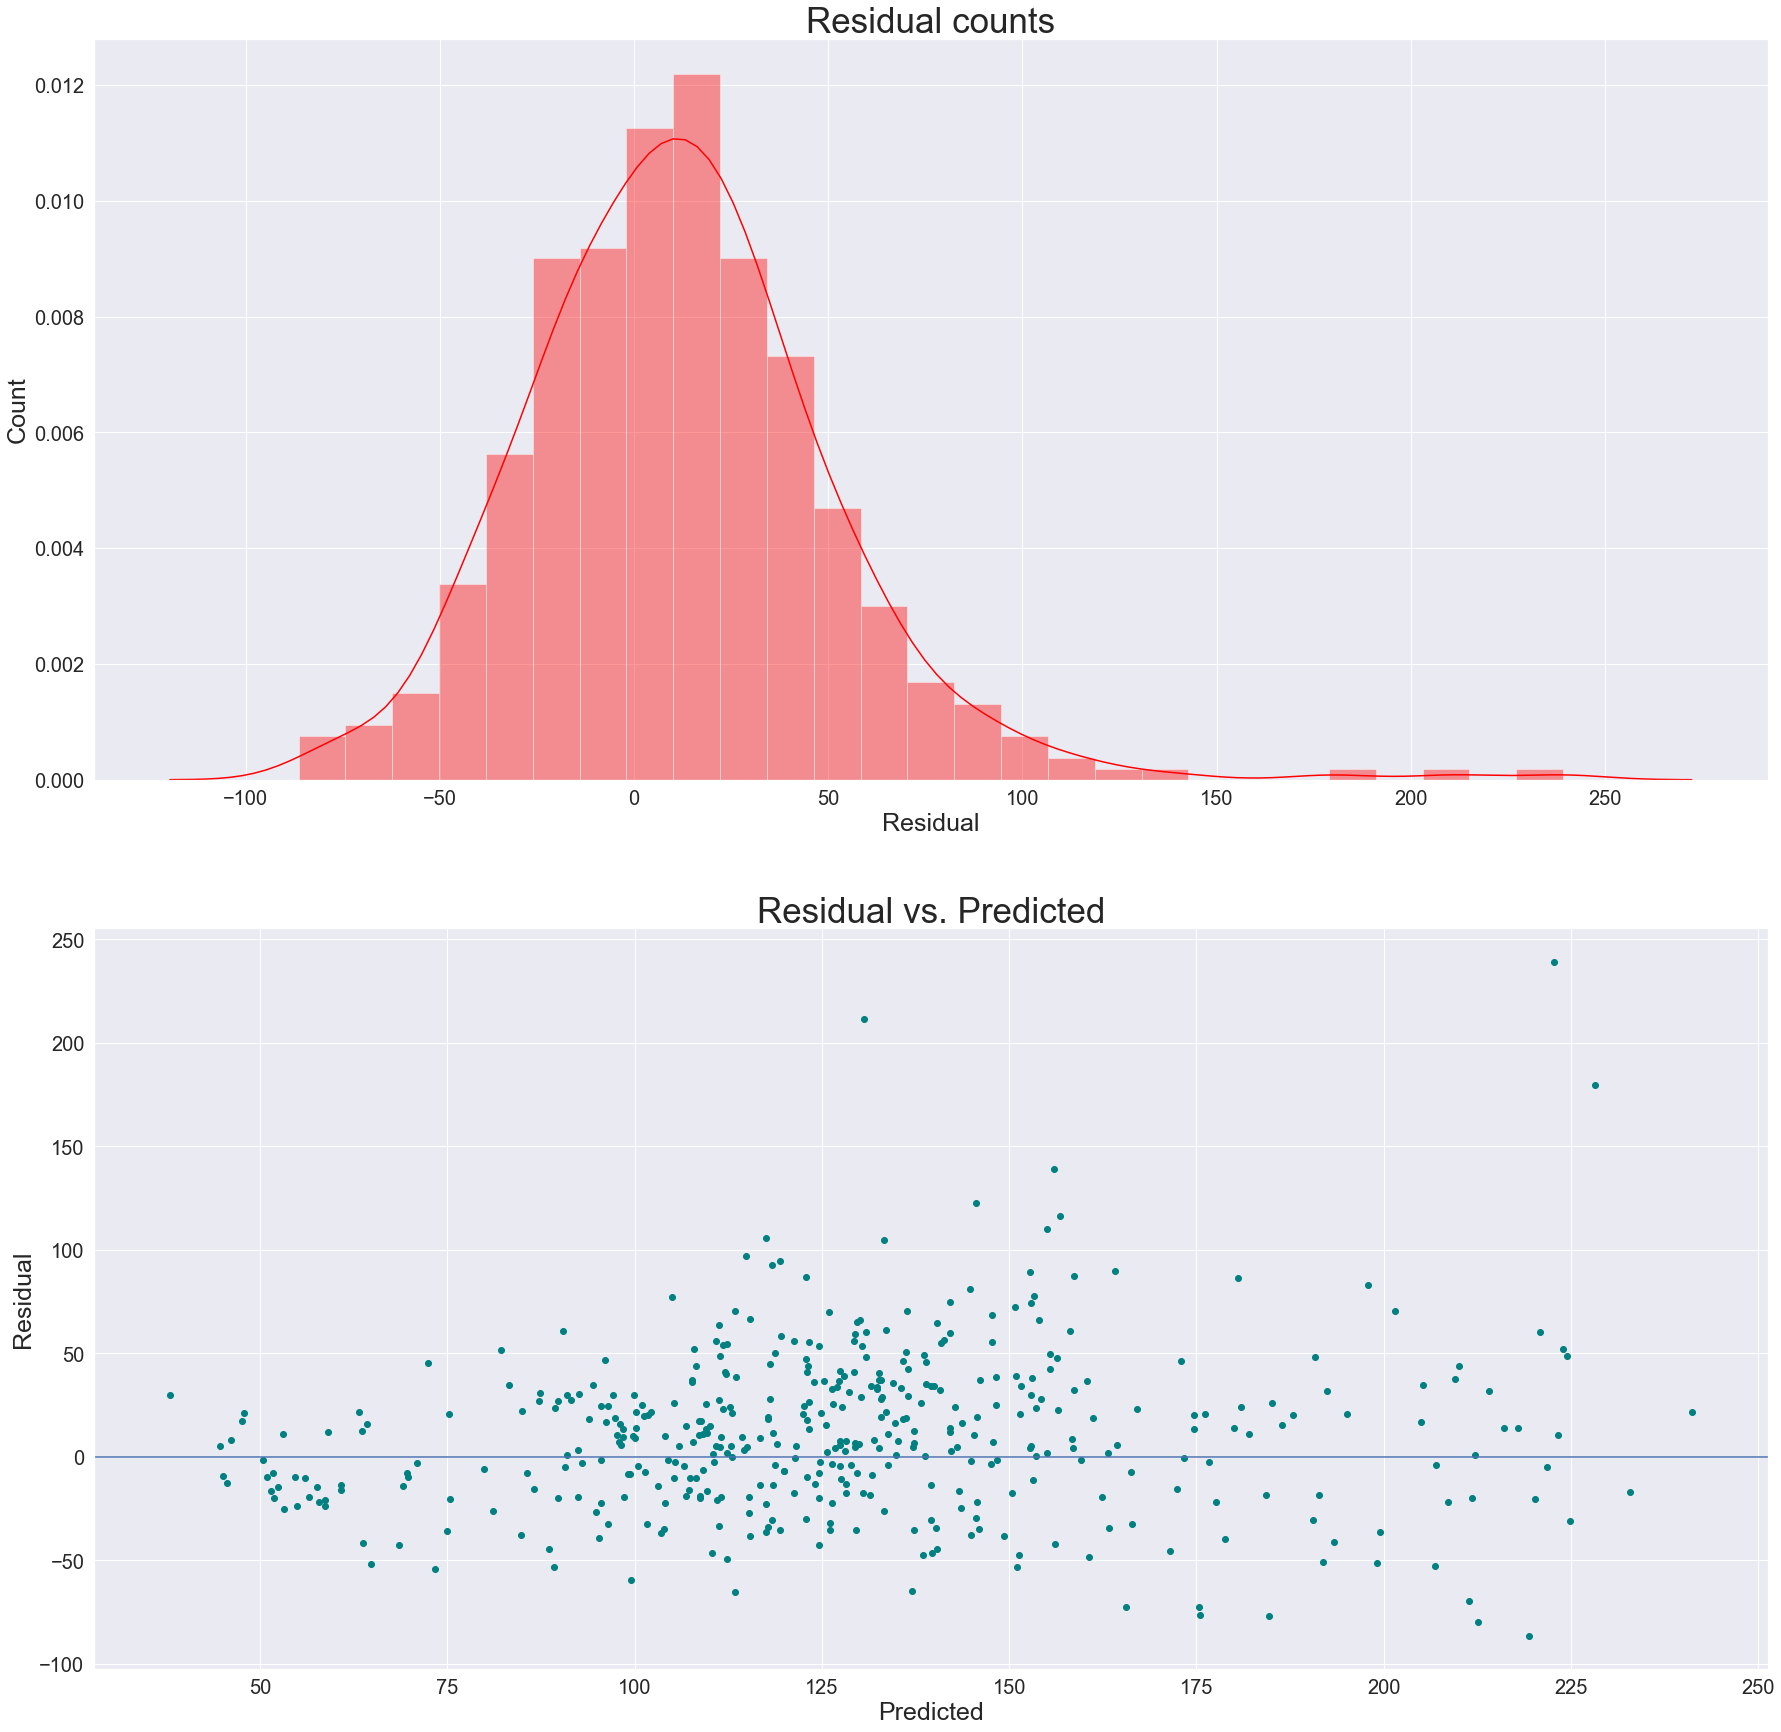

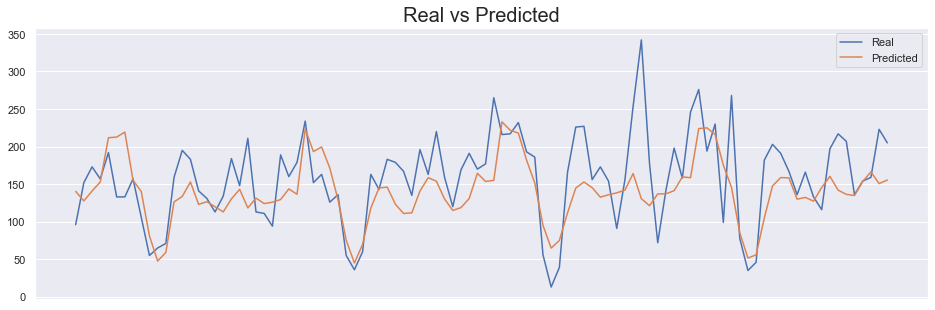

In [ ]:
model = LGBMRegressor(**best_params_LGBMR).fit(X_train, y_train) #
y_pred = model.predict(X_test)
rmse_func(y_test, y_pred)
print('ВИЗУАЛИЗАЦИЯ ЛУЧШЕЙ МОДЕЛИ')
model_visual(y_test.values, y_pred)

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что результат был визуализирован.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Все модели после оптимизации показали значение меньше порогового. Лучшая LGBMRegressor
</div>

Для прогнозирования временного ряда были выполнены следующие шаги:
1. Данные ресемплированы по 1 часу
2. Проведена генерация признаков
3. Методом перебора найдена лучшая модель с лучшими гиперпараметрами из: 'Lasso', 'Ridge', 'RandomForestRegressor', 'LGBMRegressor', данные сведеныны в 1 таблицу
4. В качестве лучшей выбрана LGBMRegressor при max_lag = 26, rolling_mean_size =6
5. Достигнутое значение метрики RMSE = 39.37 на тестовой выборке, что меньше порогового 48
6. При сравнения полученого результата с качеством полученым из среднего значения и предыдушего значения, модель адекватна

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть хорошо структурированный вывод.
</div>

# Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48